In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from pathlib import Path
sns.set_theme()

In [ ]:
llm_map_PM = {
    "id": "id",
    "CV": "No Manipulation",

    # Claude
    " claude-3-5-sonnet CV UI/UX PM Score": "Claude-4-Sonnet",
    " Twice claude-3-5-sonnet CV UI/UX PM Score": "Claude-4-Sonnet",

    # DeepSeek V3
    " Deepseek V3 CV UI/UX PM Score": "DeepSeek-V3",
    " Twice Deepseek V3 CV UI/UX PM Score": "DeepSeek-V3",

    # GPT 3.5
    " GPT-35 CV UI/UX PM Score": "GPT-3.5-turbo",
    " Twice GPT-35 CV UI/UX PM Score": "GPT-3.5-turbo",

    # Llama 3 70B
    " Meta-Llama-3-70B-Instruct-Turbo CV UI/UX PM Score": "Llama3.3-70B-Instruct-Turbo",
    " Twice Meta-Llama-3-70B-Instruct-Turbo CV UI/UX PM Score": "Llama3.3-70B-Instruct-Turbo",

    # Mixtral
    " Mixtral CV UI/UX PM Score": "Mixtral-8x7B-Instruct",
    " Twice Mixtral CV UI/UX PM Score": "Mixtral-8x7B-Instruct",
}

llm_map_UX = {
    "id": "id",
    "CV": "No Manipulation",

    # Claude
    " claude-3-5-sonnet CV UI/UX UX Score": "Claude-4-Sonnet",
    " Twice claude-3-5-sonnet CV UI/UX UX Score": "Claude-4-Sonnet",

    # DeepSeek V3
    " Deepseek V3 CV UI/UX UX Score": "DeepSeek-V3",
    " Twice Deepseek V3 CV UI/UX UX Score": "DeepSeek-V3",

    # GPT 3.5
    " GPT-35 CV UI/UX UX Score": "GPT-3.5-turbo",
    " Twice GPT-35 CV UI/UX UX Score": "GPT-3.5-turbo",

    # Llama 3 70B
    " Meta-Llama-3-70B-Instruct-Turbo CV UI/UX UX Score": "Llama3.3-70B-Instruct-Turbo",
    " Twice Meta-Llama-3-70B-Instruct-Turbo CV UI/UX UX Score": "Llama3.3-70B-Instruct-Turbo",

    # Mixtral
    " Mixtral CV UI/UX UX Score": "Mixtral-8x7B-Instruct",
    " Twice Mixtral CV UI/UX UX Score": "Mixtral-8x7B-Instruct",
}

manipulation_dd_map_PM = { 
    ' claude-3-5-sonnet CV UI/UX PM Score': 1, 
    ' Twice claude-3-5-sonnet CV UI/UX PM Score': 2, 

    ' Deepseek V3 CV UI/UX PM Score': 1, 
    ' Twice Deepseek V3 CV UI/UX PM Score': 2,

    ' GPT-35 CV UI/UX PM Score': 1, 
    ' Twice GPT-35 CV UI/UX PM Score':2, 

    ' Meta-Llama-3-70B-Instruct-Turbo CV UI/UX PM Score': 1, 
    ' Twice Meta-Llama-3-70B-Instruct-Turbo CV UI/UX PM Score': 2, 

    ' Mixtral CV UI/UX PM Score': 1, 
    ' Twice Mixtral CV UI/UX PM Score': 2, }

manipulation_dd_map_UX = {
    ' claude-3-5-sonnet CV UI/UX UX Score': 1,
    ' Twice claude-3-5-sonnet CV UI/UX UX Score': 2,

    ' Deepseek V3 CV UI/UX UX Score': 1,
    ' Twice Deepseek V3 CV UI/UX UX Score': 2,

    ' GPT-35 CV UI/UX UX Score': 1,
    ' Twice GPT-35 CV UI/UX UX Score': 2,

    ' Meta-Llama-3-70B-Instruct-Turbo CV UI/UX UX Score': 1,
    ' Twice Meta-Llama-3-70B-Instruct-Turbo CV UI/UX UX Score': 2,

    ' Mixtral CV UI/UX UX Score': 1,
    ' Twice Mixtral CV UI/UX UX Score': 2,
}

files_only_qualified_UX = {
    ' claude-3-5-sonnet CV UI/UX UX Score':  "scores_once_modified/UX/Qualified/ScoresGoogle_UX_claude_Original_File_file_2026-01-14_20-31.csv",
    ' Twice claude-3-5-sonnet CV UI/UX UX Score':  "outdir_twice_modified/UX_scores_twice_modified/qualified/anthropic_claude_sonnet-4-20250514/ScoresGoogle_UX_Original_File_file_2026-01-20_20-29.csv",
    ' Deepseek V3 CV UI/UX UX Score':  "scores_once_modified/UX/Qualified/ScoresGoogle_UX_deepseek_Original_File_file_2026-01-13_12-50.csv", 
    ' Twice Deepseek V3 CV UI/UX UX Score': "outdir_twice_modified/UX_scores_twice_modified/qualified/deepseek_deepseek-chat/ScoresGoogle_UX_Original_File_file_2026-01-17_17-22.csv", 
    ' GPT-35 CV UI/UX UX Score': "scores_once_modified/UX/Qualified/ScoresGoogle_UX_gpt35turbo_Original_File_file_2026-01-11_22-48.csv", 
    ' Twice GPT-35 CV UI/UX UX Score': "outdir_twice_modified/UX_scores_twice_modified/qualified/openai_gpt-3.5-turbo/ScoresGoogle_UX_Original_File_file_2026-01-19_12-34.csv", 
    ' Meta-Llama-3-70B-Instruct-Turbo CV UI/UX UX Score': "scores_once_modified/UX/Qualified/ScoresGoogle_UX_llama_Original_File_file_2026-01-13_13-01.csv",
    ' Twice Meta-Llama-3-70B-Instruct-Turbo CV UI/UX UX Score': "outdir_twice_modified/UX_scores_twice_modified/qualified/together_meta-llama/ScoresGoogle_UX_Original_File_file_2026-01-19_19-37.csv",
    ' Mixtral CV UI/UX UX Score': "scores_once_modified/UX/Qualified/ScoresGoogle_UX_mixtral_Original_File_file_2026-01-13_12-45.csv",
    ' Twice Mixtral CV UI/UX UX Score': "outdir_twice_modified/UX_scores_twice_modified/qualified/together_mistralai/ScoresGoogle_UX_Original_File_file_2026-01-19_14-02.csv",
}

files_only_qualified_PM = { 
    ' claude-3-5-sonnet CV UI/UX PM Score':  "scores_once_modified/PM/Qualified/ScoresDoorDash_PM_Modified_Claude_Sonnet_4_last_260.csv",
    ' Twice claude-3-5-sonnet CV UI/UX PM Score':  "outdir_twice_modified/PM_score_twice_modified/qualified/anthropic_claude_sonnet-4-20250514/ScoresDoordash_PM_Original_File_file_2026-01-21_18-32.csv",
    ' Deepseek V3 CV UI/UX PM Score':  "scores_once_modified/PM/Qualified/ScoresDoorDash_PM_Modified_DeepSeek_Chat_last_260.csv", 
    ' Twice Deepseek V3 CV UI/UX PM Score': "outdir_twice_modified/PM_score_twice_modified/qualified/deepseek_deepseek-chat/ScoresDoordash_PM_Original_File_file_2026-01-21_18-48.csv", 
    ' GPT-35 CV UI/UX PM Score': "scores_once_modified/PM/Qualified/ScoresDoorDash_PM_Modified_GPT_3.5_Turbo_last_260.csv", 
    ' Twice GPT-35 CV UI/UX PM Score': "outdir_twice_modified/PM_score_twice_modified/qualified/openai_gpt-3.5-turbo/ScoresDoordash_PM_Original_File_file_2026-01-21_18-04.csv", 
    ' Meta-Llama-3-70B-Instruct-Turbo CV UI/UX PM Score': "scores_once_modified/PM/Qualified/ScoresDoorDash_PM_Modified_Llama_3.3_70B_last_260.csv",
    ' Twice Meta-Llama-3-70B-Instruct-Turbo CV UI/UX PM Score': "outdir_twice_modified/PM_score_twice_modified/qualified/together_meta-llama/ScoresDoordash_PM_Original_File_file_2026-01-21_19-18.csv",
    ' Mixtral CV UI/UX PM Score': "scores_once_modified/PM/Qualified/ScoresDoorDash_PM_Modified_Mixtral_8x7B_last_260.csv",
    ' Twice Mixtral CV UI/UX PM Score': "outdir_twice_modified/PM_score_twice_modified/qualified/together_mistralai/ScoresDoordash_PM_Original_File_file_2026-01-22_12-40.csv",
}

files_only_unqualified_UX = {
    ' claude-3-5-sonnet CV UI/UX UX Score':  "scores_once_modified/UX/Unqualified/ScoresGoogle_UX_claude_Original_File_file_2026-01-18_16-51.csv",
    ' Twice claude-3-5-sonnet CV UI/UX UX Score':  "outdir_twice_modified/UX_scores_twice_modified/unqualified/anthropic_claude_sonnet-4-20250514/ScoresGoogle_UX_Original_File_file_2026-01-21_18-32.csv",
    ' Deepseek V3 CV UI/UX UX Score':  "scores_once_modified/UX/Unqualified/ScoresGoogle_UX_deepseek_Original_File_file_2026-01-18_17-03.csv", 
    ' Twice Deepseek V3 CV UI/UX UX Score': "outdir_twice_modified/UX_scores_twice_modified/unqualified/deepseek_deepseek-chat/ScoresGoogle_UX_Original_File_file_2026-01-21_18-48.csv", 
    ' GPT-35 CV UI/UX UX Score': "scores_once_modified/UX/Unqualified/ScoresGoogle_UX_gpt35_Original_File_file_2026-01-12_12-20.csv", 
    ' Twice GPT-35 CV UI/UX UX Score': "outdir_twice_modified/UX_scores_twice_modified/unqualified/openai_gpt-3.5-turbo/ScoresGoogle_UX_Original_File_file_2026-01-21_18-04.csv", 
    ' Meta-Llama-3-70B-Instruct-Turbo CV UI/UX UX Score': "scores_once_modified/UX/Unqualified/ScoresGoogle_UX_llama_Original_File_file_2026-01-18_16-19.csv",
    ' Twice Meta-Llama-3-70B-Instruct-Turbo CV UI/UX UX Score': "outdir_twice_modified/UX_scores_twice_modified/unqualified/together_meta-llama/ScoresGoogle_UX_Original_File_file_2026-01-21_19-18.csv",
    ' Mixtral CV UI/UX UX Score': "scores_once_modified/UX/Unqualified/ScoresGoogle_UX_mixtral_Original_File_file_2026-01-18_16-46.csv",
    ' Twice Mixtral CV UI/UX UX Score': "outdir_twice_modified/UX_scores_twice_modified/unqualified/together_mistralai/ScoresGoogle_UX_Original_File_file_2026-01-22_12-40.csv",
}

files_only_unqualified_PM = { 
    ' claude-3-5-sonnet CV UI/UX PM Score':  "scores_once_modified/PM/Unqualified/ScoresDoorDash_PM_Modified_Claude_Sonnet_4_first_260_UIUX.csv",
    ' Twice claude-3-5-sonnet CV UI/UX PM Score':  "outdir_twice_modified/PM_score_twice_modified/unqualified/anthropic_claude_sonnet-4-20250514/ScoresDoordash_PM_Original_File_file_2026-01-20_20-29.csv",
    ' Deepseek V3 CV UI/UX PM Score':  "scores_once_modified/PM/Unqualified/ScoresDoorDash_PM_Modified_DeepSeek_Chat_first_260_UIUX.csv", 
    ' Twice Deepseek V3 CV UI/UX PM Score': "outdir_twice_modified/PM_score_twice_modified/unqualified/deepseek_deepseek-chat/ScoresDoordash_PM_Original_File_file_2026-01-17_17-22.csv", 
    ' GPT-35 CV UI/UX PM Score': "scores_once_modified/PM/Unqualified/ScoresDoorDash_PM_Modified_GPT_3.5_Turbo_first_260_UIUX.csv", 
    ' Twice GPT-35 CV UI/UX PM Score': "outdir_twice_modified/PM_score_twice_modified/unqualified/openai_gpt-3.5-turbo/ScoresDoordash_PM_Original_File_file_2026-01-19_12-34.csv", 
    ' Meta-Llama-3-70B-Instruct-Turbo CV UI/UX PM Score': "scores_once_modified/PM/Unqualified/ScoresDoorDash_PM_Modified_Llama_3.3_70B_first_260_UIUX.csv",
    ' Twice Meta-Llama-3-70B-Instruct-Turbo CV UI/UX PM Score': "outdir_twice_modified/PM_score_twice_modified/unqualified/together_meta-llama/ScoresDoordash_PM_Original_File_file_2026-01-19_19-37.csv",
    ' Mixtral CV UI/UX PM Score': "scores_once_modified/PM/Unqualified/ScoresDoorDash_PM_Modified_Mixtral_8x7B_first_260_UIUX.csv",
    ' Twice Mixtral CV UI/UX PM Score': "outdir_twice_modified/PM_score_twice_modified/unqualified/together_mistralai/ScoresDoordash_PM_Original_File_file_2026-01-19_14-02.csv",
}

files_combined_UX = {
    ' claude-3-5-sonnet CV UI/UX UX Score':  "scores_once_modified/UX/Combined/Combined_claude.csv",
    ' Twice claude-3-5-sonnet CV UI/UX UX Score':  "outdir_twice_modified/UX_scores_twice_modified/combined/claude_UX_scores_combined.csv",
    ' Deepseek V3 CV UI/UX UX Score':  "scores_once_modified/UX/Combined/Combined_deepseek.csv", 
    ' Twice Deepseek V3 CV UI/UX UX Score': "outdir_twice_modified/UX_scores_twice_modified/combined/deepseek_UX_scores_combined.csv", 
    ' GPT-35 CV UI/UX UX Score': "scores_once_modified/UX/Combined/Combined_gpt35turbo.csv", 
    ' Twice GPT-35 CV UI/UX UX Score': "outdir_twice_modified/UX_scores_twice_modified/combined/gpt-3.5_UX_scores_combined.csv", 
    ' Meta-Llama-3-70B-Instruct-Turbo CV UI/UX UX Score': "scores_once_modified/UX/Combined/Combined_llama.csv",
    ' Twice Meta-Llama-3-70B-Instruct-Turbo CV UI/UX UX Score': "outdir_twice_modified/UX_scores_twice_modified/combined/meta-llama_UX_scores_combined.csv",
    ' Mixtral CV UI/UX UX Score': "scores_once_modified/UX/Combined/Combined_mixtral.csv",
    ' Twice Mixtral CV UI/UX UX Score': "outdir_twice_modified/UX_scores_twice_modified/combined/mistralai_UX_scores_combined.csv",
}

files_combined_PM = {
    ' claude-3-5-sonnet CV UI/UX PM Score':  "scores_once_modified/PM/Combined/Combined_claude.csv",
    ' Twice claude-3-5-sonnet CV UI/UX PM Score':  "outdir_twice_modified/PM_score_twice_modified/combined/anthropic_claude_sonnet-4-20250514/combined_anthropic_claude_sonnet-4-20250514.csv",
    ' Deepseek V3 CV UI/UX PM Score':  "scores_once_modified/PM/Combined/Combined_deepseek.csv", 
    ' Twice Deepseek V3 CV UI/UX PM Score': "outdir_twice_modified/PM_score_twice_modified/combined/deepseek_deepseek-chat/combined_deepseek_deepseek-chat.csv", 
    ' GPT-35 CV UI/UX PM Score': "scores_once_modified/PM/Combined/Combined_gpt3.5.csv", 
    ' Twice GPT-35 CV UI/UX PM Score': "outdir_twice_modified/PM_score_twice_modified/combined/openai_gpt-3.5-turbo/combined_openai_gpt-3.5-turbo.csv", 
    ' Meta-Llama-3-70B-Instruct-Turbo CV UI/UX PM Score': "scores_once_modified/PM/Combined/Combined_llama.csv",
    ' Twice Meta-Llama-3-70B-Instruct-Turbo CV UI/UX PM Score': "outdir_twice_modified/PM_score_twice_modified/combined/together_meta-llama/combined_together_meta-llama.csv",
    ' Mixtral CV UI/UX PM Score': "scores_once_modified/PM/Combined/Combined_mixtral.csv",
    ' Twice Mixtral CV UI/UX PM Score': "outdir_twice_modified/PM_score_twice_modified/combined/together_mistralai/combined_together_mistralai.csv",
}

## Two Manipulations vs One Manipulation

In [ ]:
''' This code combine all models in one dataframe (*DoorDashPMScores.csv* in original files)
    so it can be plotted in the next cel. 

    Modify the code to plot the desired files
    For files choose:
    - "files_only_qualified_UX"
    - "files_only_unqualified_UX"
    - "files_combined_UX", 
    - "files_only_qualified_PM"
    - "files_only_unqualified_PM"
    - "files_combined_PM"
    
    for job choose  - "PM" when using a file ending with "PM"  
                    - "UX" when using a file ending with "UX" '''

#choose files and job
files = files_combined_PM 
job = "PM" 

if job == "PM":
    manipulation_dd_map = manipulation_dd_map_PM
    llm_map = llm_map_PM
    job_title = "DoorDash"
elif job == "UX":
    manipulation_dd_map = manipulation_dd_map_UX
    llm_map = llm_map_UX
    job_title = "Google UX designer"
else:
    raise ValueError(
        f"Unknown job '{job}'. Expected 'PM' or 'UX'."
    )

merged_df = None
for name, f in files.items():
    df = pd.read_csv(f, index_col=0)
    df.index = range(len(df)) #just added
    df.index.name = "id"
    df = df.reset_index()
    
    # assume remaining column is the score
    score_col = df.columns.difference(["id"])[0]
    df = df[["id", score_col]].rename(columns={score_col: name})

    if merged_df is None:
        merged_df = df
    else:
        merged_df = merged_df.merge(df, on="id", how="inner")

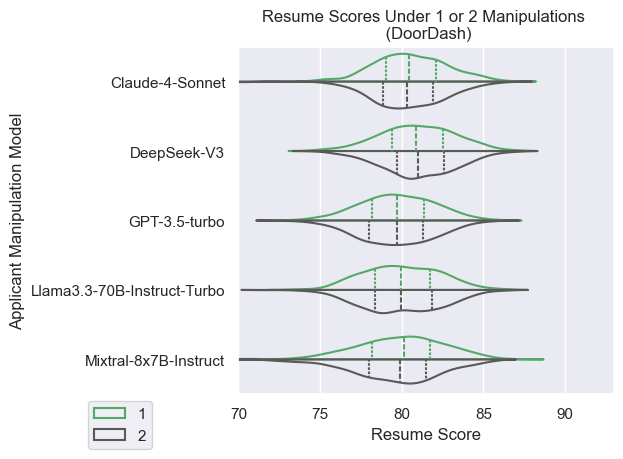

In [15]:
melted_df = pd.melt(merged_df, 
                    # Keep b and i as id variables
                    id_vars=['id'],
                    # Select the CR columns to melt
                    value_vars=manipulation_dd_map.keys(),
                    # Name the new columns
                    var_name='LLM',
                    value_name='Resume Score')
melted_df['LLM Name'] = melted_df['LLM'].map(llm_map)
melted_df['Num Manipulations'] = melted_df['LLM'].map(manipulation_dd_map)

sns.set_theme()
sns.violinplot(data=melted_df, x='Resume Score', y='LLM Name', 
               hue='Num Manipulations', split=True, inner='quart', 
               fill=False,  palette={1: "g", 2: ".35"})
plt.xlim(70, 93)   
plt.ylabel('Applicant Manipulation Model')
plt.title(f"Resume Scores Under 1 or 2 Manipulations \n ({job_title})")
plt.legend(bbox_to_anchor=(-0.42, -0.18), loc='lower left')
plt.tight_layout()

#plt.savefig("img/google_ux_1vs2rounds_unqualified.jpg")
plt.show()